<a href="https://colab.research.google.com/github/ranjitunb/Activity-Monitoring/blob/master/Copy_of_Facies_Class_Statistical_Volve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving POC_Lith_ML.csv to POC_Lith_ML.csv
User uploaded file "POC_Lith_ML.csv" with length 962062 bytes


In [ ]:
print (uploaded['POC_Lith_ML.csv'][:200].decode('utf-8') + '...')

UWI,DEPTH,CGR,DT,ILD,NPHI,RHOB,Lith
AH-0089,9252,19.3283,53.1875,1.06313,0.0464,2.7656,13
AH-0089,9252.5,20.0145,53.75,2.19428,0.0288,2.9336,13
AH-0089,9253,19.80589,54.3125,13.6296,0.0088,2.9961,1...


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
import seaborn as sns
#sns.set_style('darkgrid')
import pandas as pd
import io

data = pd.read_csv(io.StringIO(uploaded['Litho.csv'].decode('utf-8')))
data

,Well Name,Depth,DT,GR,NPHI,RD,RHOB,RS,RT,Facies
0,15/9-F-15 C,3128.0100,81.6660,22.6920,0.1486,19.9442,2.4075,22.7427,21.2650,5
1,15/9-F-15 C,3128.1624,86.7372,25.2135,0.1811,18.9891,2.3455,23.3299,22.4169,5
2,15/9-F-15 C,3128.3148,90.8735,27.7864,0.1943,16.3889,2.2811,13.4747,16.1898,5
3,15/9-F-15 C,3128.4672,93.5215,30.2138,0.2147,14.7298,2.2184,11.4917,13.7156,5
4,15/9-F-15 C,3128.6196,94.2851,29.3334,0.2199,13.2999,2.1776,11.6721,12.9624,5
...,...,...,...,...,...,...,...,...,...,...
5771,15/9-F-4,3423.5136,85.0386,60.5678,0.3838,6.1526,1.9276,8.7818,5.7985,1
5772,15/9-F-4,3423.6660,86.5391,68.6820,0.3609,9.3021,1.9228,361.8292,47.4034,1
5773,15/9-F-4,3423.8184,95.2364,77.5573,0.4114,43.7877,2.0288,5000.0000,5000.0000,1
5774,15/9-F-4,3423.9708,99.5419,87.0899,0.4729,200.0000,2.1698,67.6813,195.9572,1


In [ ]:
data.shape

(5776, 10)

The six predictor variables are:

> Six wire line log curves include gamma ray (GR), resistivity logging (RT & RS), Neutron Porosity (NPHI), Bulk Density (RHOB), Sonic (DT).

The seven discrete facies (classes of rocks) are:

1. Tidal Bar -  Coarse- to fine-grained sandstone with finingand coarsening-upward motifs. Moderately to well sorted with sub-rounded grains
2. Offshore -Coarse- to fine-grained sandstone with fining- and coarsening-upward motifs. Moderately to well sorted with sub-rounded grains. Sparse sedimentary structures include ripples and mudstone drapes.
3. Tidal Channel - Fining-upward very coarse- to fine-grained sandstone with possible bidirectional cross-sets and swaley cross-stratification.
4. Mouthbar - Very fine grained sandstone with with cross stratification.
5. Lower Shoreface - Very fine to fine grained, moderately to well sorted sandstone with fine fine carbonaceous laminae throughout.
6. Marsh
7. Tidal Flat Muddy - Interbedded claystone





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5776 entries, 0 to 5775
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well Name  5776 non-null   object 
 1   Depth      5776 non-null   float64
 2   DT         5776 non-null   float64
 3   GR         5776 non-null   float64
 4   NPHI       5776 non-null   float64
 5   RD         5776 non-null   float64
 6   RHOB       5776 non-null   float64
 7   RS         5776 non-null   float64
 8   RT         5776 non-null   float64
 9   Facies     5776 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 451.4+ KB


In [ ]:
# Let's clean up this dataset. The 'Well Name' and 'Formation' columns can be turned into a categorical data type.
data['Well Name'] = data['Well Name'].astype('category')
#data['Litho'] = data['Litho'].astype('category')
data['Well Name'].unique()

[15/9-F-15 C, 15/9-F-15 A, 15/9-F-14, 15/9-F-12, 15/9-F-5, 15/9-F-4]
Categories (6, object): [15/9-F-15 C, 15/9-F-15 A, 15/9-F-14, 15/9-F-12, 15/9-F-5, 15/9-F-4]

In [ ]:
data.isnull().any()

Well Name    False
Depth        False
DT           False
GR           False
NPHI         False
RD           False
RHOB         False
RS           False
RT           False
Facies       False
dtype: bool

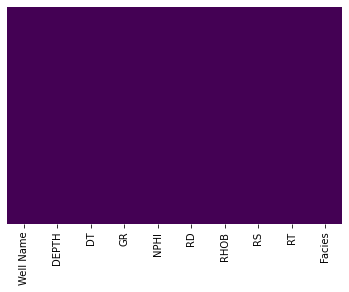

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Before we plot the well data, let's define a color map so the facies are represented by consistent color in all the plots in this tutorial. We also create the abbreviated facies labels, and add those to the facies_vectors dataframe.

In [ ]:


# 1=Tidal Bar  2=Offshore   3=Tidal Channel
# 4=Mouthbar 5=Lower Shoreface 6=Marsh 7=Tidal Flat Muddy

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1']

facies_labels = ['Tidal Bar', 'Offshore', 'Channel', 'Mouthbar', 'LShoreface',
                 'Marsh', 'Muddy']

#facies_color_map is a dictionary that maps facies labels
#to their respective colors

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)
data.describe()

,Depth,DT,GR,NPHI,RD,RHOB,RS,RT,Facies
count,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000
mean,3371.077604,85.588484,36.549780,0.203053,44.804411,2.261494,103.198031,177.615110,3.031337
std,247.686472,6.985347,17.214489,0.039086,91.898840,0.106318,422.792300,729.123213,1.526410
min,3000.451200,52.584600,10.681200,0.062700,0.133200,1.334100,0.154300,0.142700,1.000000
25%,3161.385600,82.732475,22.541525,0.178975,5.678950,2.195400,4.945500,5.919775,1.000000
50%,3304.717800,86.418150,33.867050,0.201900,18.799950,2.240300,20.933800,22.841200,3.000000
75%,3573.513300,89.952475,47.450775,0.225500,50.504250,2.300000,54.922100,60.163375,4.000000
max,3897.020400,108.654500,189.994400,0.704000,1319.274000,2.719900,5000.000000,5000.000000,7.000000


Let's take a look at the data from individual wells in a more familiar log plot form. We will create plots for the five well log variables, as well as a log for facies labels.*italicized text*

In [ ]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs.Depth.min(); zbot=logs.Depth.max()

    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RD, logs.Depth, '-')
    ax[2].plot(logs.DT, logs.Depth, '-', color='b')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    ax[4].plot(logs.NPHI, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)

#    cbar.set_label((12*' ').join([' Sand ', 'C Silt', 'F Silt',
#                                'Silt/Sh', ' MudS ', ' WackS ', ' Dolo  ',
#                                ' PackS ', ' BaffS ']))

    cbar.set_label((14*' ').join(facies_labels))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RD")
    ax[1].set_xlim(logs.RT.min(),logs.RT.max())
    ax[2].set_xlabel("DT")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("NPHI")
    ax[4].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[5].set_xlabel('Facies')

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

Placing the log plotting code in a function will make it easy to plot the logs from multiples wells, and can be reused later to view the results when we apply the facies classification model to other wells. The function was written to take a list of colors and facies labels as parameters. We then show log plots for wells SHRIMPLIN, SHANKLE and 'NOLAN'.

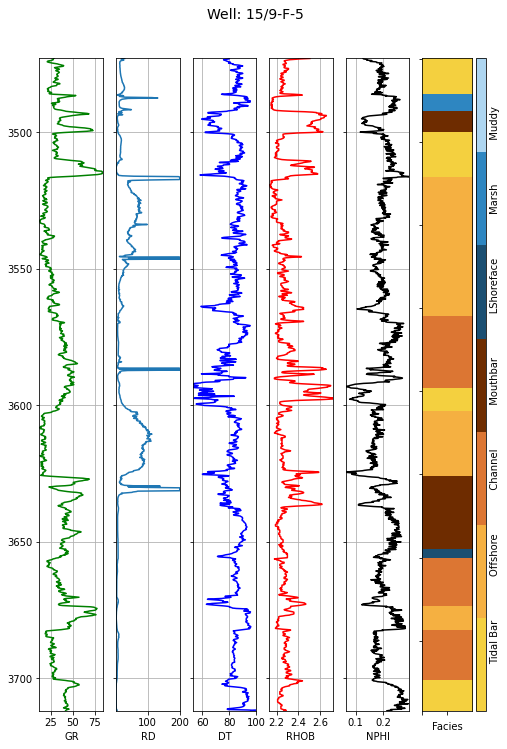

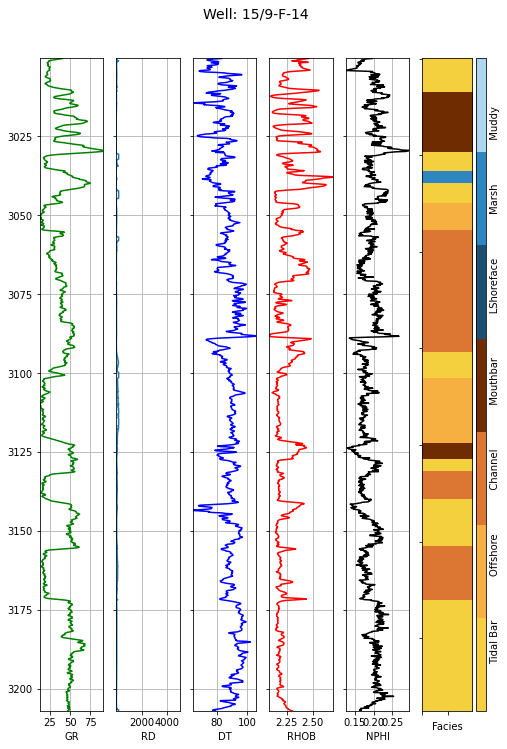

In [ ]:

make_facies_log_plot(
    data[data['Well Name'] == '15/9-F-5'],
    facies_colors)

make_facies_log_plot(
    data[data['Well Name'] == '15/9-F-14'],
    facies_colors)

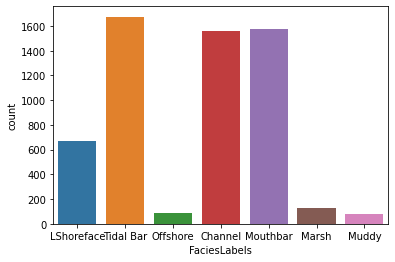

Tidal Bar     1675
Mouthbar      1579
Channel       1562
LShoreface     669
Marsh          125
Offshore        85
Muddy           81
Name: FaciesLabels, dtype: int64

In [ ]:

sns.countplot(data['FaciesLabels'],label="Count")
plt.show()
data['FaciesLabels'].value_counts()

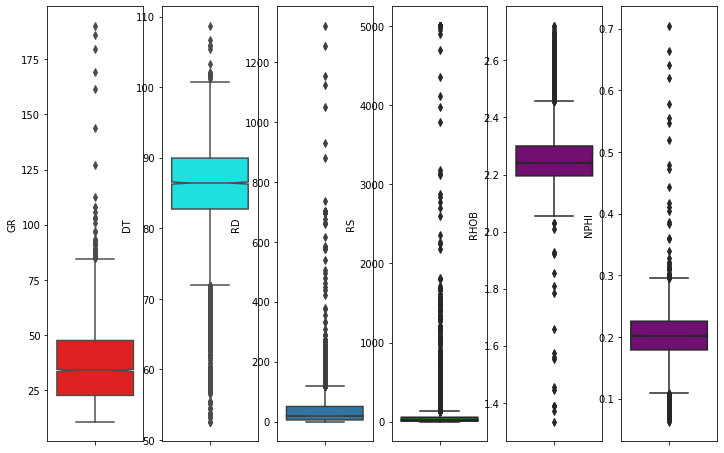

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(12, 8))
sns.boxplot(y='GR', data=data, color='red', notch=True, ax=axes[0])
sns.boxplot(y='DT', data=data, color='cyan', notch=True, ax=axes[1])
sns.boxplot(y='RD', data=data, notch=True, ax=axes[2])
sns.boxplot(y='RS', data=data, color='green', notch=True, ax=axes[3])
sns.boxplot(y='RHOB', data=data, color='purple', notch=True, ax=axes[4])
sns.boxplot(y='NPHI', data=data, color='purple', notch=True, ax=axes[5])


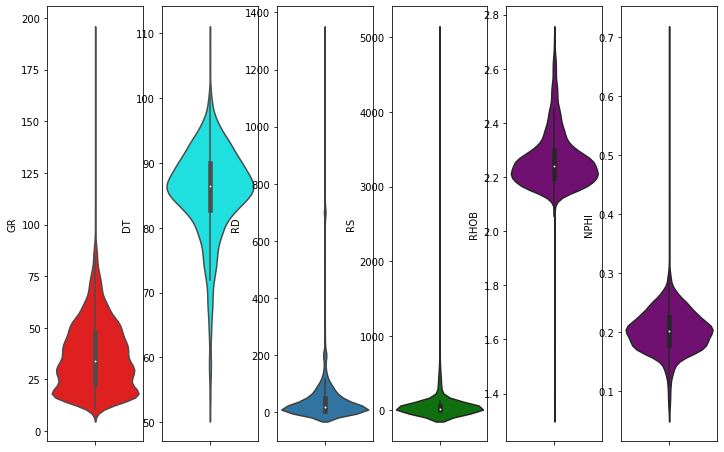

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(12, 8))
sns.violinplot(y='GR', data=data, color='red', notch=True, ax=axes[0])
sns.violinplot(y='DT', data=data, color='cyan', notch=True, ax=axes[1])
sns.violinplot(y='RD', data=data, notch=True, ax=axes[2])
sns.violinplot(y='RS', data=data, color='green', notch=True, ax=axes[3])
sns.violinplot(y='RHOB', data=data, color='purple', notch=True, ax=axes[4])
sns.violinplot(y='NPHI', data=data, color='purple', notch=True, ax=axes[5])



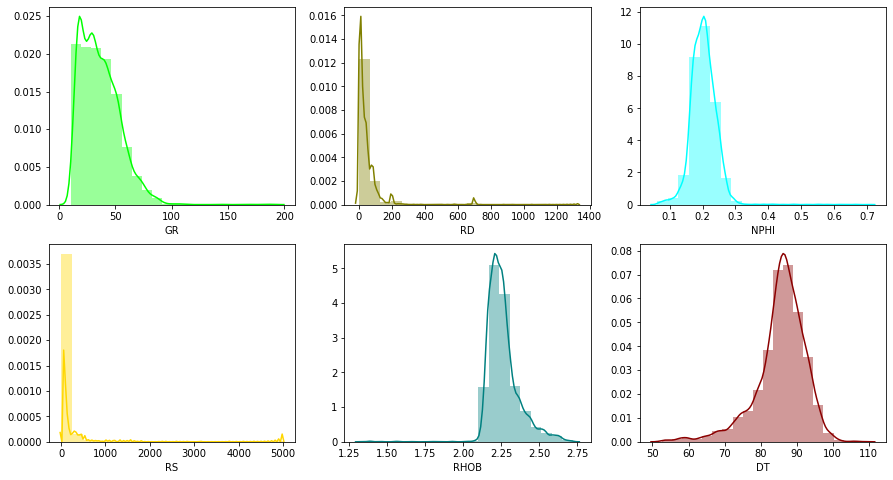

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=False)
sns.distplot( data["GR"] , bins=20, color="lime", ax=axes[0, 0])
sns.distplot( data["RD"] , bins=20, color="olive", ax=axes[0, 1])
sns.distplot( data["RS"] , bins=20, color="gold", ax=axes[1, 0])
sns.distplot( data["RHOB"] , bins=20, color="teal", ax=axes[1, 1])
sns.distplot( data["NPHI"] , bins=20, color="cyan", ax=axes[0, 2])
sns.distplot( data["DT"] , bins=20, color="darkred", ax=axes[1, 2])


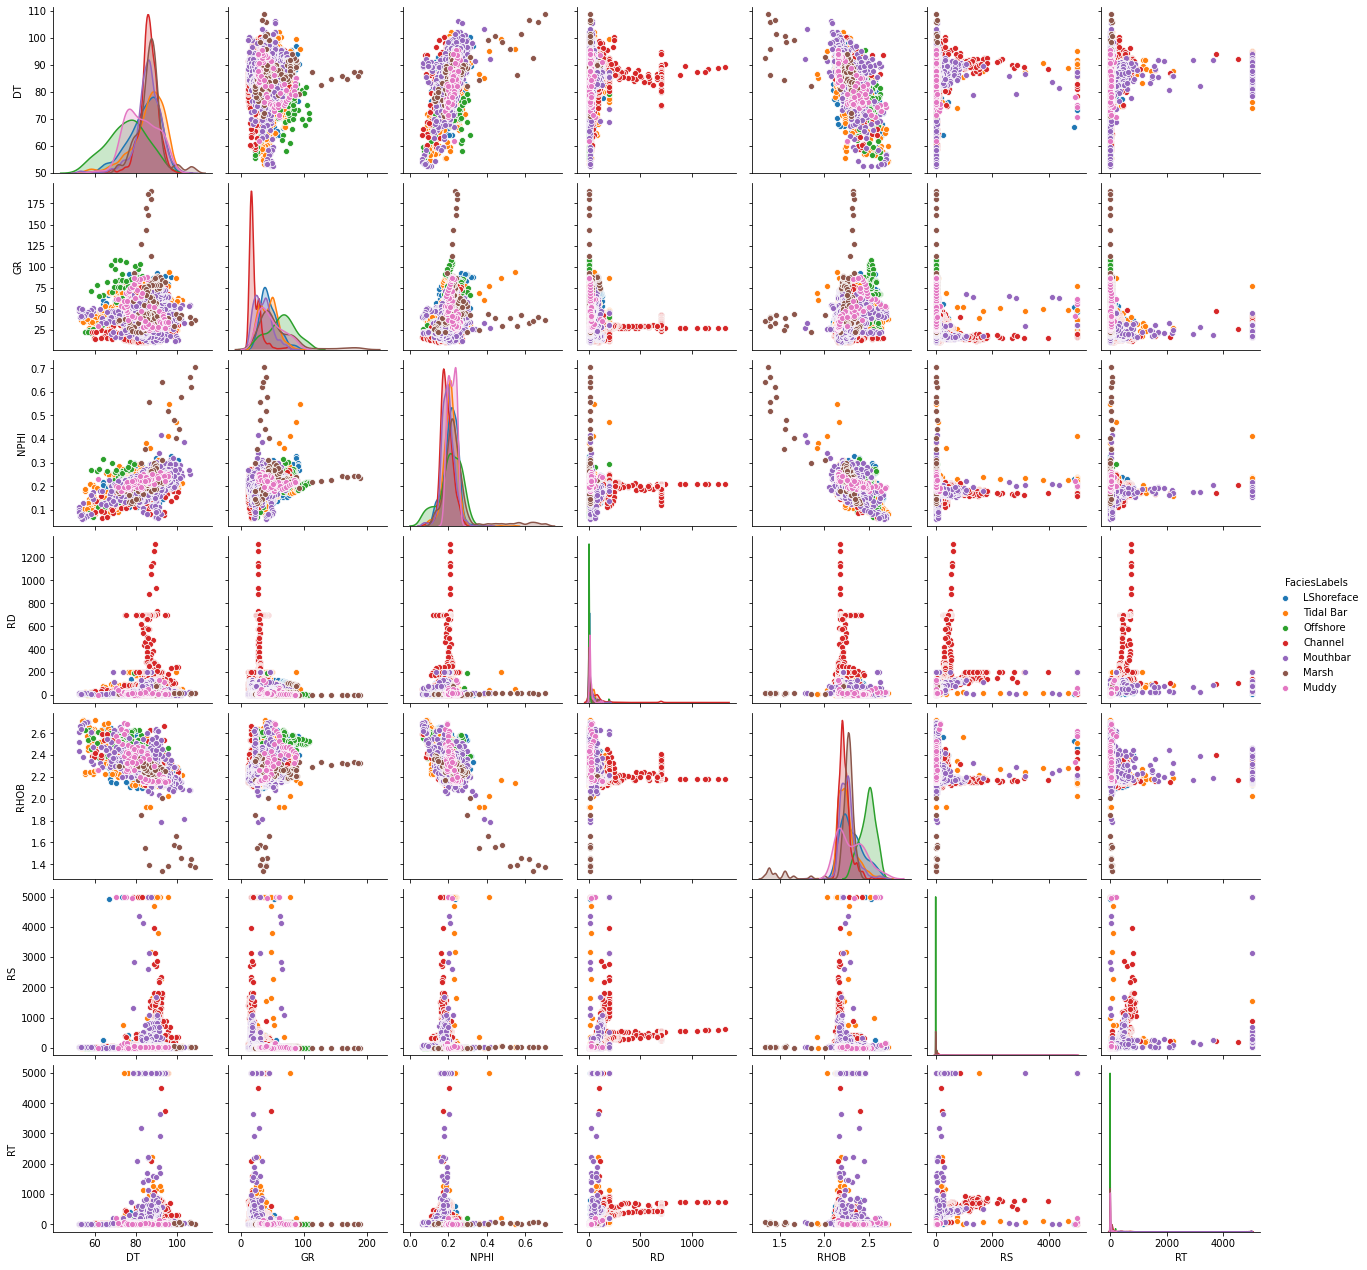

In [ ]:
import seaborn as sns
sns.pairplot(data.drop(['Well Name', 'Facies', 'Depth'],axis=1), hue='FaciesLabels')

Now we extract just the feature variables we need to perform the classification. The predictor variables are the five wireline values and two geologic constraining variables. We also get a vector of the facies labels that correspond to each feature vector.

In [ ]:
facies_labels = data['Facies'].values

feature_vectors = data.drop([ 'Well Name', 'Depth','Facies', 'RT', 'RS', 'FaciesLabels'], axis=1)
feature_vectors.describe()

,DT,GR,NPHI,RD,RHOB
count,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000
mean,85.588484,36.549780,0.203053,44.804411,2.261494
std,6.985347,17.214489,0.039086,91.898840,0.106318
min,52.584600,10.681200,0.062700,0.133200,1.334100
25%,82.732475,22.541525,0.178975,5.678950,2.195400
50%,86.418150,33.867050,0.201900,18.799950,2.240300
75%,89.952475,47.450775,0.225500,50.504250,2.300000
max,108.654500,189.994400,0.704000,1319.274000,2.719900


In [ ]:
df = feature_vectors
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  DT
capping the  GR
capping the  NPHI
capping the  RD
capping the  RHOB


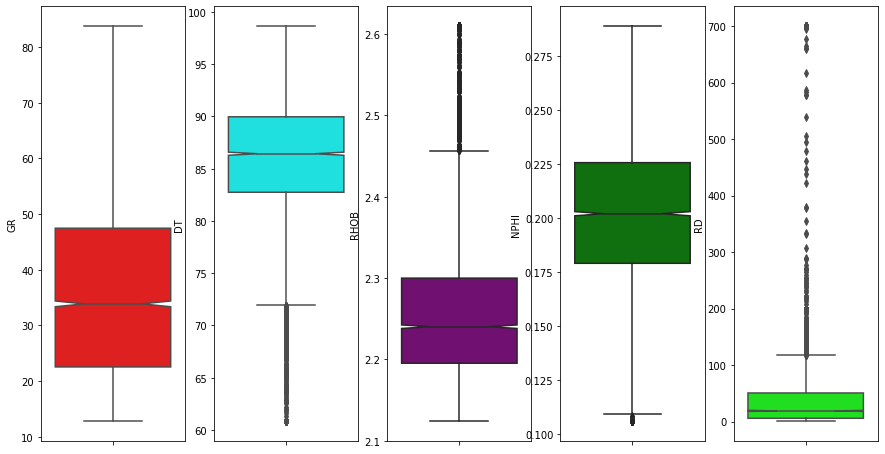

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 8))
sns.boxplot(y='GR', data=final_df, color='red', notch=True, ax=axes[0])
sns.boxplot(y='DT', data=final_df, color='cyan', notch=True, ax=axes[1])
sns.boxplot(y='RHOB', data=final_df, color='purple', notch=True, ax=axes[2])
sns.boxplot(y='NPHI', data=final_df, color='green', notch=True, ax=axes[3])
sns.boxplot(y='RD', data=final_df, color='lime', notch=True, ax=axes[4])
#sns.boxplot(y='RS', data=final_df, color='blue', notch=True, ax=axes[5])


Scikit includes a preprocessing module that can 'standardize' the data (giving each variable zero mean and unit variance, also called whitening). Many machine learning algorithms assume features will be standard normally distributed data (ie: Gaussian with zero mean and unit variance). The factors used to standardize the training set must be applied to any subsequent feature set that will be input to the classifier. The StandardScalar class can be fit to the training set, and later used to standardize any training data.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(final_df)
scaled_features = scaler.transform(final_df)

In [ ]:
# Split Train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, facies_labels, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {}

    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'KNeighbors': {
        'model': KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean'),
        'params': {}
    },
    'extra_trees_classifier': {
        'model': ExtraTreesClassifier(),
        'params': {}
    },
    'MLP_Classifier': {
        'model': MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(20,10),random_state=1),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],

        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

,model,best_score,best_params
0,svm,0.693939,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.842424,{}
2,naive_bayes_gaussian,0.481602,{}
3,KNeighbors,0.735931,{}
4,extra_trees_classifier,0.848918,{}
5,MLP_Classifier,0.677922,{}
6,decision_tree,0.761905,{'criterion': 'entropy'}


In [ ]:
clf = ExtraTreesClassifier()
#clf.fit(X_train,y_train)
clf

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
print(rf_random.best_params_)

In [ ]:
#clf = ExtraTreesClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False)
clf = ExtraTreesClassifier()

In [ ]:
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
conf

array([[304,   1,  14,  11,   8,   0,   0],
       [  4,   9,   0,   2,   6,   0,   0],
       [  6,   0, 285,  10,   0,   1,   0],
       [ 20,   0,  21, 270,   6,   2,   0],
       [ 12,   0,   4,  26,  82,   2,   1],
       [  5,   0,   0,   3,   3,  18,   0],
       [  6,   1,   0,   0,   5,   0,   8]])

Text(69.0, 0.5, 'Actual')

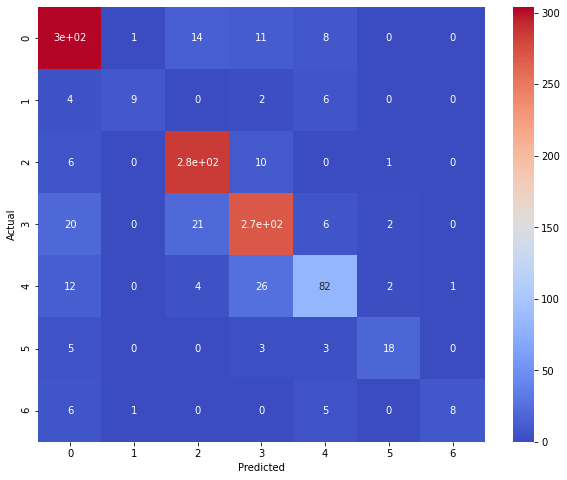

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(conf, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
print( 'Facies classification accuracy = %f' % accuracy(conf))


Facies classification accuracy = 0.844291


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Tidal Bar', 'Offshore', 'Channel', 'Mouthbar', 'Shoreface', 'Marsh', 'Muddy']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Tidal Bar       0.85      0.90      0.87       338
    Offshore       0.82      0.43      0.56        21
     Channel       0.88      0.94      0.91       302
    Mouthbar       0.84      0.85      0.84       319
   Shoreface       0.75      0.65      0.69       127
       Marsh       0.78      0.62      0.69        29
       Muddy       0.89      0.40      0.55        20

    accuracy                           0.84      1156
   macro avg       0.83      0.68      0.73      1156
weighted avg       0.84      0.84      0.84      1156



## Applying the classification model to new **data**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Litho_Test_vector.csv to Litho_Test_vector.csv
User uploaded file "Litho_Test_vector.csv" with length 110193 bytes


In [ ]:
print (uploaded['Litho_Test_vector.csv'][:200].decode('utf-8') + '...')

Well Name,Depth,DT,GR,NPHI,RD,RHOB,RT
15/9-F-1,3435,75.4135,60.0839,0.1329,1.8651,2.5674,1.9923
15/9-F-1,3435.1,75.6356,57.6456,0.1333,1.7082,2.5601,1.6792
15/9-F-1,3435.2,75.5593,59.1704,0.1368,1....


In [ ]:
well_data = pd.read_csv(io.StringIO(uploaded['Litho_Test_vector.csv'].decode('utf-8')))

In [ ]:
well_data['Well Name'] = well_data['Well Name'].astype('category')
well_features = well_data.drop([ 'Well Name', 'Depth', 'RT'], axis=1)
well_features

,DT,GR,NPHI,RD,RHOB
0,75.4135,60.0839,0.1329,1.8651,2.5674
1,75.6356,57.6456,0.1333,1.7082,2.5601
2,75.5593,59.1704,0.1368,1.6290,2.5593
3,75.3317,62.5547,0.1397,1.6483,2.5626
4,74.9573,62.2378,0.1461,1.6811,2.5641
...,...,...,...,...,...
1868,81.8800,48.9210,0.1830,0.4230,2.3300
1869,81.2800,49.3170,0.1790,0.4320,2.3410
1870,80.6320,51.3430,0.1760,0.4470,2.3510
1871,80.0870,52.8140,0.1750,0.4900,2.3610


In [ ]:
well_data

,Well Name,Depth,DT,GR,NPHI,RD,RHOB,RT
0,15/9-F-1,3435.0,75.4135,60.0839,0.1329,1.8651,2.5674,1.9923
1,15/9-F-1,3435.1,75.6356,57.6456,0.1333,1.7082,2.5601,1.6792
2,15/9-F-1,3435.2,75.5593,59.1704,0.1368,1.6290,2.5593,1.5550
3,15/9-F-1,3435.3,75.3317,62.5547,0.1397,1.6483,2.5626,1.6491
4,15/9-F-1,3435.4,74.9573,62.2378,0.1461,1.6811,2.5641,1.8038
...,...,...,...,...,...,...,...,...
1868,15/9-F-11 T2,4496.6,81.8800,48.9210,0.1830,0.4230,2.3300,0.3820
1869,15/9-F-11 T2,4496.7,81.2800,49.3170,0.1790,0.4320,2.3410,0.3950
1870,15/9-F-11 T2,4496.8,80.6320,51.3430,0.1760,0.4470,2.3510,0.4130
1871,15/9-F-11 T2,4496.9,80.0870,52.8140,0.1750,0.4900,2.3610,0.4440


In [ ]:
X_features = scaler.transform(well_features)

In [ ]:
X_features

array([[-1.49770676,  1.43706802, -2.02119121, -0.48771306,  3.10007373],
       [-1.46506937,  1.28912325, -2.00957672, -0.48951589,  3.02578405],
       [-1.47628158,  1.38164107, -1.90794992, -0.49042592,  3.01764272],
       ...,
       [-0.73085299,  0.90671064, -0.76972976, -0.50400742,  0.89784272],
       [-0.81094024,  0.99596412, -0.79876599, -0.50351334,  0.9996094 ],
       [-0.85767004,  1.03546378, -0.79876599, -0.5030882 ,  1.09119942]])

In [ ]:
#predict facies of unclassified data
y_label = clf.predict(X_features)
well_data['Facies'] = y_label
well_data

,Well Name,Depth,DT,GR,NPHI,RD,RHOB,RT,Facies
0,15/9-F-1,3435.0,75.4135,60.0839,0.1329,1.8651,2.5674,1.9923,5
1,15/9-F-1,3435.1,75.6356,57.6456,0.1333,1.7082,2.5601,1.6792,5
2,15/9-F-1,3435.2,75.5593,59.1704,0.1368,1.6290,2.5593,1.5550,5
3,15/9-F-1,3435.3,75.3317,62.5547,0.1397,1.6483,2.5626,1.6491,5
4,15/9-F-1,3435.4,74.9573,62.2378,0.1461,1.6811,2.5641,1.8038,5
...,...,...,...,...,...,...,...,...,...
1868,15/9-F-11 T2,4496.6,81.8800,48.9210,0.1830,0.4230,2.3300,0.3820,1
1869,15/9-F-11 T2,4496.7,81.2800,49.3170,0.1790,0.4320,2.3410,0.3950,1
1870,15/9-F-11 T2,4496.8,80.6320,51.3430,0.1760,0.4470,2.3510,0.4130,1
1871,15/9-F-11 T2,4496.9,80.0870,52.8140,0.1750,0.4900,2.3610,0.4440,1


In [ ]:
well_data['Well Name'].unique()

[15/9-F-1, 15/9-F-11 A, 15/9-F-11 T2]
Categories (3, object): [15/9-F-1, 15/9-F-11 A, 15/9-F-11 T2]

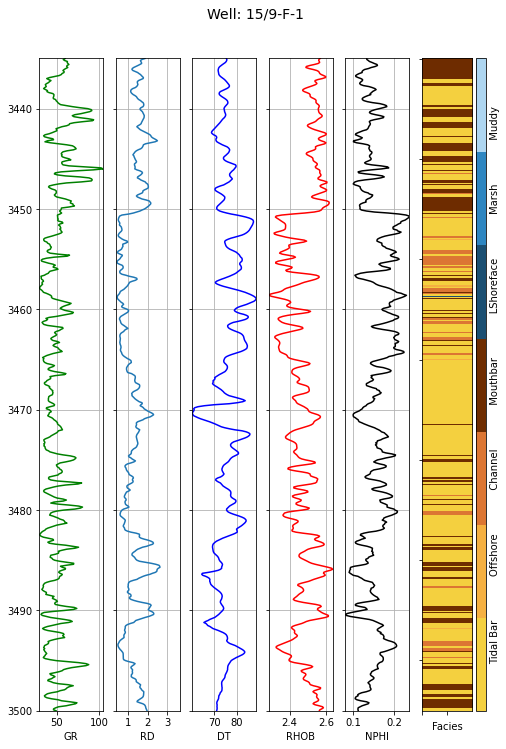

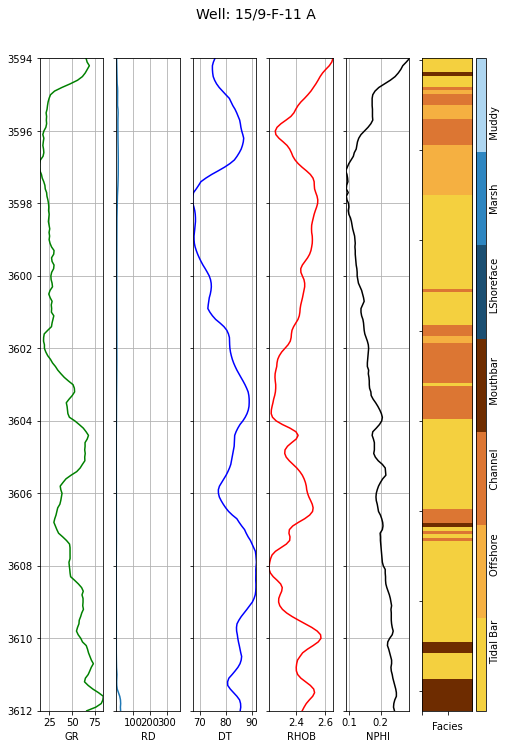

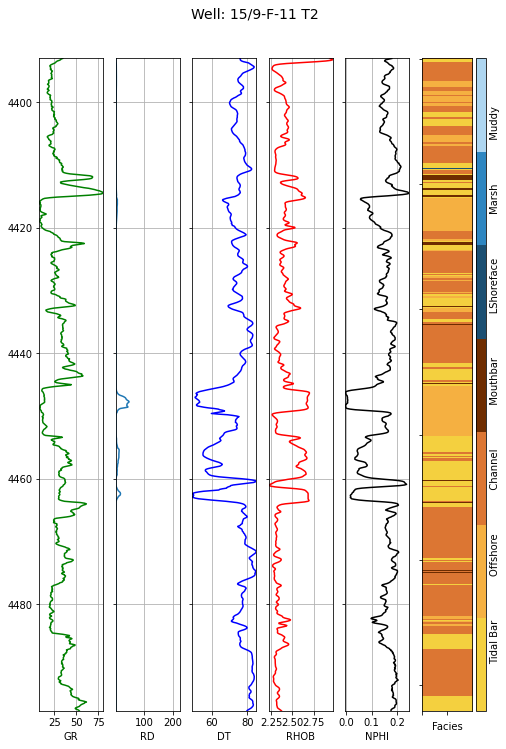

In [ ]:


make_facies_log_plot(
    well_data[well_data['Well Name'] == '15/9-F-1'],
    facies_colors=facies_colors)
make_facies_log_plot(
    well_data[well_data['Well Name'] == '15/9-F-11 A'],
    facies_colors=facies_colors)
make_facies_log_plot(
    well_data[well_data['Well Name'] == '15/9-F-11 T2'],
    facies_colors=facies_colors)


In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(clf, 'Facies_Extra_Tree_Volve')

['Facies_Extra_Tree_Volve']